# Import Necessary libaries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('./drive/MyDrive/Colab Notebooks/data/fire_and_non_fire.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
image_shape = (224, 224)
batch_size = 32

train_data, test_data = keras.utils.image_dataset_from_directory(directory='./fire_dataset/',
                                                                 subset='both',
                                                                 validation_split=0.2,
                                                                 image_size=image_shape,
                                                                 batch_size=batch_size,
                                                                 label_mode='binary',
                                                                 shuffle=True,
                                                                 seed=42)

In [ ]:
train_data.class_names

['fire_images', 'non_fire_images']

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers.experimental.preprocessing import (RandomFlip,
                                                               RandomZoom,
                                                               RandomHeight,
                                                               RandomWidth,
                                                               RandomRotation)

data_augmentation = Sequential([
    RandomFlip(),
    RandomZoom((0.2, 0.2)),
    RandomRotation((0.2, 0.2)),
    RandomHeight((0.2, 0.2)),
    RandomWidth((0.2, 0.2))
])

# creating some helper function

In [ ]:
def show_layers(model):
  for count, layer in enumerate(model.layers):
    print(count, layer, layer.trainable)

In [ ]:
def show_curve(history):
  train_loss = history['loss']
  val_loss = history['val_loss']
  train_accuracy = history['accuracy']
  val_accuracy = history['val_accuracy']
  plt.figure(figsize=(7, 10))
  plt.subplot(2, 1, 1)
  plt.plot(train_loss)
  plt.plot(val_loss)
  plt.title('loss')
  plt.subplot(2, 1, 2)
  plt.plot(train_accuracy)
  plt.plot(val_accuracy)
  plt.title('accuracy')

\# Cronstructing Architecture

## Efficient Net V2B3 Architechture

In [ ]:
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

efficientnet_v2b3_base_model = keras.applications.efficientnet_v2.EfficientNetV2B3(include_top=False)
efficientnet_v2b3_base_model.trainable = False

input = Input(shape=(224, 224, 3), name='input_layer')

x = efficientnet_v2b3_base_model(input)

x = GlobalAveragePooling2D(name='global_average_pooling_2d')(x)
output = Dense(1, activation='sigmoid', name='output_layer')(x)

efficient_v2_b3_model = Model(input, output)

efficient_v2_b3_model.compile(loss=BinaryCrossentropy(),
                              optimizer=Adam(),
                              metrics=['accuracy'])

In [ ]:
show_layers(efficientnet_v2b3_base_model)

In [ ]:
efficient_v2_b3_history = efficient_v2_b3_model.fit(train_data,
                                                    epochs=10,
                                                    steps_per_epoch=len(train_data),
                                                    batch_size=batch_size,
                                                    validation_data=test_data,
                                                    validation_steps=0.25 * len(test_data),
                                                    validation_batch_size=batch_size)

Epoch 1/10
25/25 [==============================] - 36s 644ms/step - loss: 0.3749 - accuracy: 0.8587 - val_loss: 0.1975 - val_accuracy: 0.9375
Epoch 2/10
25/25 [==============================] - 15s 401ms/step - loss: 0.1602 - accuracy: 0.9625 - val_loss: 0.1136 - val_accuracy: 0.9688
Epoch 3/10
25/25 [==============================] - 15s 477ms/step - loss: 0.1121 - accuracy: 0.9712 - val_loss: 0.0887 - val_accuracy: 0.9688
Epoch 4/10
25/25 [==============================] - 14s 469ms/step - loss: 0.0926 - accuracy: 0.9762 - val_loss: 0.0741 - val_accuracy: 0.9688
Epoch 5/10
25/25 [==============================] - 17s 530ms/step - loss: 0.0813 - accuracy: 0.9837 - val_loss: 0.0656 - val_accuracy: 0.9688
Epoch 6/10
25/25 [==============================] - 16s 421ms/step - loss: 0.0753 - accuracy: 0.9825 - val_loss: 0.0595 - val_accuracy: 0.9688
Epoch 7/10
25/25 [==============================] - 17s 528ms/step - loss: 0.0643 - accuracy: 0.9875 - val_loss: 0.0551 - val_accuracy: 0.9844

In [ ]:
efficient_v2_b3_history = pd.DataFrame(efficient_v2_b3_history.history)
efficient_v2_b3_history

,loss,accuracy,val_loss,val_accuracy
0,0.374932,0.85875,0.197490,0.937500
1,0.160225,0.96250,0.113586,0.968750
2,0.112123,0.97125,0.088665,0.968750
3,0.092574,0.97625,0.074087,0.968750
4,0.081277,0.98375,0.065587,0.968750
5,0.075308,0.98250,0.059530,0.968750
6,0.064283,0.98750,0.055060,0.984375
7,0.063119,0.98500,0.051550,0.984375
8,0.060319,0.98375,0.049255,0.984375
9,0.057970,0.98625,0.047581,0.984375


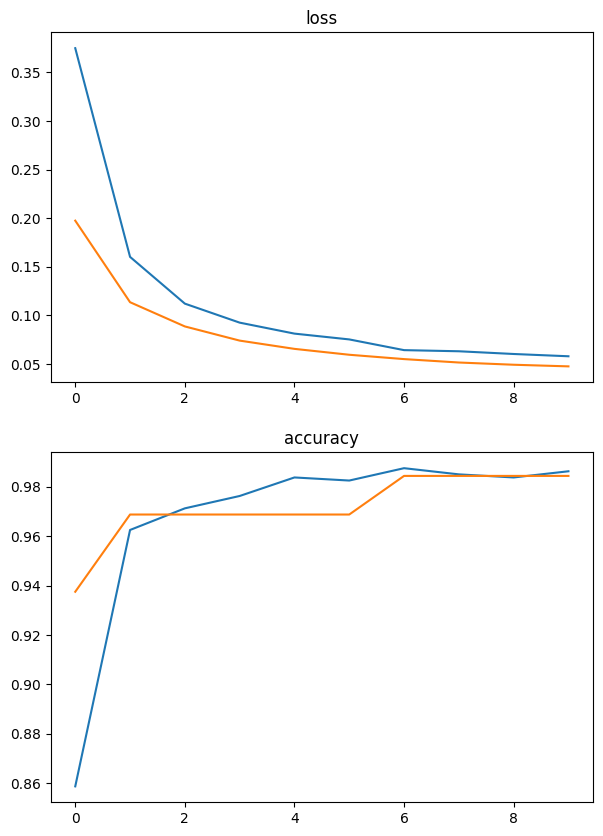

In [ ]:
show_curve(efficient_v2_b3_history)

In [ ]:
efficient_v2_b3_model.evaluate(test_data)

7/7 [==============================] - 5s 551ms/step - loss: 0.0654 - accuracy: 0.9749


[0.06542457640171051, 0.9748743772506714]

In [ ]:
efficient_v2_b3_model.save('./drive/MyDrive/Colab Notebooks/model/efficient_v2_b3_fire_classifier.h5')